# Question 1


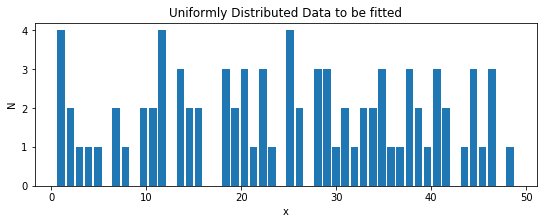

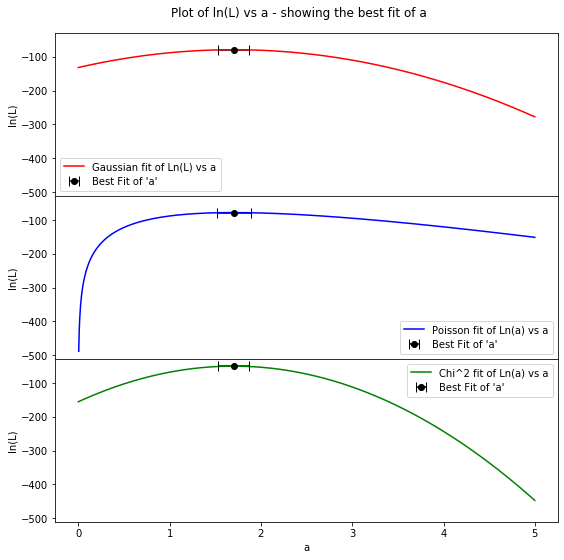

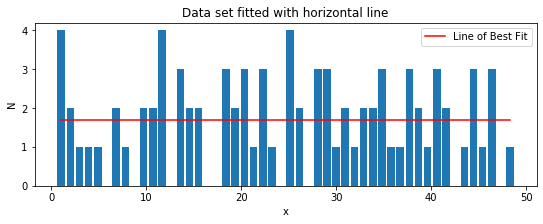

+--------------+------------+-------------+-------------+
| Distribution |    Mean    | Lower Error | Upper Error |
+--------------+------------+-------------+-------------+
|   Gaussian   |     1.7017 |      0.1702 |      0.1652 |
|   Poisson    |     1.7017 |      0.1846 |      0.1846 |
|    Chi^2     |     1.7017 |      0.1702 |      0.1652 |
+--------------+------------+-------------+-------------+


In [2]:
from prettytable import PrettyTable
%matplotlib inline
from scipy.io import loadmat
import matplotlib.pyplot as plt
import math
import numpy as np

n=x=0
W = loadmat('W5dataP1.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['n', 'x']})

y = n
dy = np.full(len(y),np.std(y))

# Plot data set to be fitted.
figure = plt.figure(figsize=(9,3))
plot = plt.subplot(1,1,1)
plt.bar(x,y)
plt.title("Uniformly Distributed Data to be fitted")
plt.ylabel("N"); plt.xlabel("x")
plt.show()

## MAXIMUM LIKELIHOOD FUNCTIONS
def f(x,b):
    return b # Just fitting a horizontal line, so just a straight line with 0 gradient.

## PROBABILITY FUNCTION FOR EACH DISTRIBUTION
def gaussian_probability(y,sigma,f):
    if(sigma == 0): return -float('inf')
    p = (1/(sigma*(2*np.pi)**0.5))\
           *np.exp(
                -(y-f)**2/(2*sigma**2)
           )
    if p == 0: return -float('inf')
    return np.log(p)

def poisson_probability(y,sigma,f):
    p = (np.exp(-f)*(f**y))/(math.factorial(y))
    if(p == 0): return -float('inf')
    return np.log(p)

def chi_probability(y,sigma,f):
    p = -((y-f)**2)/(sigma**2)
    return p


## ERROR FUNCTIONS FOR EACH DISTRIBUTION
def gaussian_error(L,maxL,bestA):
    return error(L,maxL,bestA,0.5)

def chi_error(L,maxL,bestA):
    return error(L,maxL,bestA,1)

def poisson_error(L,maxL,bestA):
    # Poisson Error can be derived as Lambda/Sqrt(Sum(Y)) using the second
    # derivative of ln(L)/a
    e = (bestA)/(np.sqrt(sum(y))) 
    return e,e



## Loop values to find the nearest upper and lower errors. maxLdeviation = 0.5 or 1 for gaussian or Chi^2
def error(L,maxL,bestA,maxLdeviation):
    # Store the best value of the upper and lower error, and check if a closer
    # value is available.
    upperA = None
    lowerA = None
    
    for a, Lvalue in L.items():
        if(Lvalue <= maxL-maxLdeviation):
            if(a < bestA):
                if(lowerA is None or abs(a-bestA) < lowerA):
                     lowerA = abs(a-bestA)
            elif(a > bestA):
                if(upperA is None or abs(a-bestA) < upperA):
                    upperA = abs(a-bestA)
    
    return upperA,lowerA

# Sums lnL for a given 'a' value and probability distribution
def lnL(a, probability_function):
    lnL = 0
    for i in range(len(y)):
        lnL += probability_function(y[i],dy[i],f(x[i],a))     
    return lnL

## FIT PARAMETER TO FUNCTION FOR A GIVEN PROBABILITY FUNCTION (And its Error)
def fitL(minA,maxA,resolution,probability_function, error_function):
    ## Store max values for A and L along with every other value for later.
    bestA = None
    maxL = 0
    L = {}
    
    ## Loop every value of a in a given range and resolution and store 
    ## the calculated value of L if it is greater than the previous.
    for a in np.linspace(minA,maxA,resolution):
        L[a] = lnL(a,probability_function)
        if bestA is None or L[a] > maxL:
            maxL = L[a]
            bestA = a
       
    ## Calculate Error     
    upperA, lowerA = error_function(L,maxL,bestA)
    error = [[lowerA],[upperA]]
    
    return bestA,error,maxL,L,

## PLOT EACH FIT.
def plotL(fitL,plot,legendLabel,style):
    bestA,error,maxL,L = fitL
    plot.plot(*zip(*L.items()),style,label=legendLabel)
    plot.errorbar(bestA,maxL, xerr=error, fmt="ko",capsize=5,label="Best Fit of 'a'")
    plot.set_ylabel("ln(L)")
    plot.legend()
    
## Plot
figure, axs = plt.subplots(3, figsize=(9, 9), sharex=True, sharey=True,gridspec_kw={'hspace': 0})
figure.suptitle("Plot of ln(L) vs a - showing the best fit of a", y=0.92)
plt.xlabel('a')


## Ranges
minA = 0
maxA = 5
resolution = 1000
step = (maxA-minA)/(resolution-1) ## Calculate step for use later.

## Fit & Plot each distribution type.
gaussianFit = fitL(minA,maxA,resolution,gaussian_probability,gaussian_error)
plotL(gaussianFit,axs[0],"Gaussian fit of Ln(L) vs a","r")

poissonFit = fitL(minA,maxA,resolution,poisson_probability,poisson_error)
plotL(poissonFit,axs[1],"Poisson fit of Ln(a) vs a","b")

chiFit = fitL(minA,maxA,resolution,chi_probability,chi_error)
plotL(chiFit,axs[2],"Chi^2 fit of Ln(a) vs a","g")

plt.show()

# Overlay Fitted line on original data set.
figure = plt.figure(figsize=(9,3))
plot = plt.subplot(1,1,1)
plt.bar(x,y)
plt.plot([min(x),max(x)],[chiFit[0],chiFit[0]],"r", label="Line of Best Fit")
plt.title("Data set fitted with horizontal line")
plt.legend()
plt.ylabel("N"); plt.xlabel("x")
plt.show()

def addRow(table,name,fit):
    table.add_row([name,"{0:10.4f}".format(fit[0]),"{0:10.4f}".format(fit[1][0][0]),"{0:10.4f}".format(fit[1][1][0])])
    
table = PrettyTable(['Distribution','Mean','Lower Error','Upper Error'])
addRow(table,"Gaussian",gaussianFit)
addRow(table,"Poisson",poissonFit)
addRow(table,"Chi^2",chiFit)
print(table)

Both the Gaussian and $\chi^2$ fits have the same mean and errors, since they follow the same shape curves - the $\chi^2$ curve is 
just twice as steep, and to find the error on the $\chi^2$ it is twice as much below the maximum value of L.
The Poisson curve however has a larger error since the curve is less steep and more spread out around the mean.


# Question 2

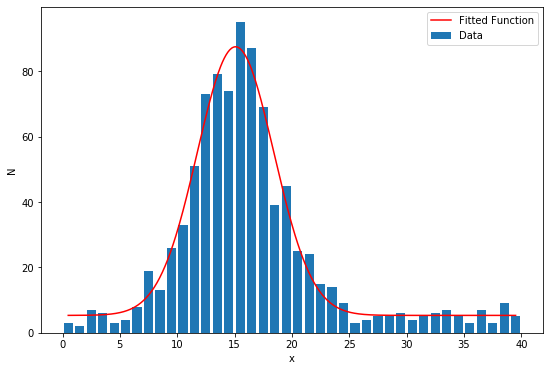

+------------------+------------+
|    Parameter     |   Value    |
+------------------+------------+
|  Peak amplitude  |    82.1510 |
| Position (mean)  |    15.0858 |
|    Width (sd)    |     3.3365 |
| Background level |     5.3237 |
+------------------+------------+


In [8]:
from scipy import optimize

n=x=0
W = loadmat('W5P2data.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['n', 'x']})

# FIRST GUESSES
mean = 15
sd   = 3
a = 70
c = 0

def fitted_function(x,a,mean,sd,c):
    return a*np.exp(
        -((x-mean)**2)/(2*sd**2)
    ) + c

params, params_covariance = optimize.curve_fit(fitted_function,x,n,p0=[a,mean,sd,c])

figure = plt.figure(figsize=(9,6))
plot = plt.subplot(1,1,1)
plt.bar(x,n,label="Data")
x_fit = np.linspace(min(x),max(x),500)
plt.plot(x_fit, fitted_function(x_fit,params[0],params[1],params[2],params[3]),"r-", label="Fitted Function")
plt.legend()
plt.ylabel("N"); plt.xlabel("x")
plt.show()

table = PrettyTable(['Parameter','Value'])
table.add_row(["Peak amplitude","{0:10.4f}".format(params[0])])
table.add_row(["Position (mean)","{0:10.4f}".format(params[1])])
table.add_row(["Width (sd)","{0:10.4f}".format(params[2])])
table.add_row(["Background level","{0:10.4f}".format(params[3])])
print(table)


